In [6]:
import numpy as np
import pandas as pd

In [7]:
trader_log = pd.read_csv('/tmp/rebalancing_trader_log.csv', names=[
    'timestamp', 'security_balance', 'cash_balance', 'price'])
trader_log['alpha'] = (trader_log['security_balance'] *
                       trader_log['price'] / trader_log['cash_balance'])
trader_log.set_index(
    pd.to_datetime(trader_log['timestamp'], utc=True, unit='s'), inplace=True)
trader_log.index.name = None
trader_log[:5]

,timestamp,security_balance,cash_balance,price,alpha
2017-01-01 00:00:00+00:00,1483228800,1.0,0.00,966.37,inf
2017-01-01 00:05:00+00:00,1483229100,0.8,192.31,966.58,4.020925
2017-01-01 00:10:00+00:00,1483229400,0.8,192.31,965.55,4.016640
2017-01-01 00:15:00+00:00,1483229700,0.8,192.31,965.55,4.016640
2017-01-01 00:20:00+00:00,1483230000,0.8,192.31,964.87,4.013811


In [8]:
trader_log[~np.isinf(trader_log['alpha'])]['alpha'].describe()

count    315002.000000
mean          4.034102
std           0.305260
min           3.200437
25%           3.811273
50%           4.023463
75%           4.253392
max           4.799196
Name: alpha, dtype: float64

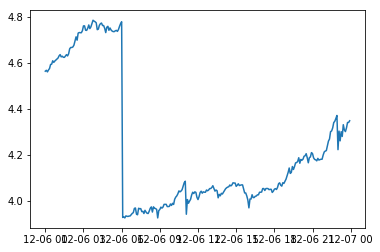

In [9]:
import matplotlib.pyplot as plt
date='2017-12-06'
plt.plot(trader_log[date].index, trader_log[date]['alpha'])

In [10]:
exchange_log = pd.read_csv('/tmp/bitstampUSD.out.csv', names=[
    'timestamp', 'open', 'high', 'low', 'close', 'volume',
    'security_balance', 'cash_balance', 'total_fee',
    'order_type', 'order_side', 'security_amount', 'cash_amount', 'price'])
exchange_log['alpha'] = (exchange_log['security_balance'] *
                         exchange_log['close'] / exchange_log['cash_balance'])
exchange_log.set_index(
    pd.to_datetime(exchange_log['timestamp'], utc=True, unit='s'), inplace=True)
exchange_log.index.name = None
exchange_log[:5]

,timestamp,open,high,low,close,volume,security_balance,cash_balance,total_fee,order_type,order_side,security_amount,cash_amount,price,alpha
2017-01-01 00:00:00+00:00,1483228800,966.34,966.37,966.16,966.37,15.697,1.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,inf
2017-01-01 00:05:00+00:00,1483229100,966.43,966.58,966.43,966.58,0.439,1.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,inf
2017-01-01 00:05:00+00:00,1483229100,966.43,966.58,966.43,966.58,0.439,0.8,192.31,0.97,MARKET,SELL,0.2,NaN,NaN,4.020925
2017-01-01 00:10:00+00:00,1483229400,966.57,966.57,964.60,965.55,6.662,0.8,192.31,0.97,NaN,NaN,NaN,NaN,NaN,4.016640
2017-01-01 00:15:00+00:00,1483229700,965.59,966.57,965.55,965.55,20.773,0.8,192.31,0.97,NaN,NaN,NaN,NaN,NaN,4.016640
